In [168]:
# Dependencies
import pandas as pd
from pathlib import Path
from dateutil import parser
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf

In [169]:
# Store filepath in a variable
file_one = Path("Resources/2013_to_2023_property-sales-data.csv")

In [170]:
# Read our data file with the Pandas library
# Not every CSV requires an encoding, but be aware this can come up
original_df = pd.read_csv(file_one, encoding="ISO-8859-1")

C:\Users\sarra\AppData\Local\Temp\ipykernel_2104\2974018042.py:3: DtypeWarning: Columns (12,17,19) have mixed types. Specify dtype option on import or set low_memory=False.
  original_df = pd.read_csv(file_one, encoding="ISO-8859-1")


In [171]:
# Show the first five rows.
original_df.head()

,ï»¿PropertyID,PropType,taxkey,Address,CondoProject,District,nbhd,Style,Extwall,Stories,Year_Built,Rooms,FinishedSqft,Units,Bdrms,Fbath,Hbath,Lotsize,Sale_date,Sale_price
0,98459.0,Commercial,30091000,9220 N 107TH ST,NaN,9.0,6202.0,Office Building - 1 Story,Concrete Block,1.0,1981.0,NaN,12960,5,NaN,0.0,0.0,54885,2023-08-15,530000
1,98477.0,Residential,39995000,9574 N 107TH ST,NaN,9.0,40.0,Cape Cod,Aluminum/Vinyl,1.0,1942.0,7.0,1182,1,4.0,1.0,1.0,33541,2023-12-15,160000
2,98500.0,Residential,40071000,9531 N MICHAEL CT,NaN,9.0,40.0,Ranch,Fiber Cement/Hardiplank,1.0,2006.0,9.0,1880,1,3.0,2.0,0.0,10607,2023-08-31,387500
3,98566.0,Residential,50047000,9350 N JOYCE AV,NaN,9.0,40.0,Ranch,Aluminum/Vinyl,1.0,1980.0,6.0,1489,1,3.0,3.0,0.0,8640,2023-08-25,335000
4,98598.0,Residential,50079000,9355 N BURBANK AV,NaN,9.0,40.0,Ranch,Aluminum/Vinyl,1.0,1986.0,5.0,1209,1,3.0,1.0,1.0,7200,2023-06-20,250000


In [172]:
#getting only 'Residential' values
residential_df = original_df.loc[original_df["PropType"] == 'Residential']
residential_df.head()

,ï»¿PropertyID,PropType,taxkey,Address,CondoProject,District,nbhd,Style,Extwall,Stories,Year_Built,Rooms,FinishedSqft,Units,Bdrms,Fbath,Hbath,Lotsize,Sale_date,Sale_price
1,98477.0,Residential,39995000,9574 N 107TH ST,NaN,9.0,40.0,Cape Cod,Aluminum/Vinyl,1.0,1942.0,7.0,1182,1,4.0,1.0,1.0,33541,2023-12-15,160000
2,98500.0,Residential,40071000,9531 N MICHAEL CT,NaN,9.0,40.0,Ranch,Fiber Cement/Hardiplank,1.0,2006.0,9.0,1880,1,3.0,2.0,0.0,10607,2023-08-31,387500
3,98566.0,Residential,50047000,9350 N JOYCE AV,NaN,9.0,40.0,Ranch,Aluminum/Vinyl,1.0,1980.0,6.0,1489,1,3.0,3.0,0.0,8640,2023-08-25,335000
4,98598.0,Residential,50079000,9355 N BURBANK AV,NaN,9.0,40.0,Ranch,Aluminum/Vinyl,1.0,1986.0,5.0,1209,1,3.0,1.0,1.0,7200,2023-06-20,250000
5,98624.0,Residential,50105000,8210 W GLENBROOK RD,NaN,9.0,40.0,Colonial,Aluminum/Vinyl,2.0,1989.0,6.0,1663,1,3.0,2.0,1.0,7200,2023-01-10,270000


In [173]:
#delete unwanted columns
residential_df.drop(['CondoProject', 'ï»¿PropertyID', 'taxkey', 'District', 'nbhd', 'Style', 'Extwall', 'Stories', 'Rooms', 'Units'], axis=1, inplace=True)

C:\Users\sarra\AppData\Local\Temp\ipykernel_2104\1831918963.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  residential_df.drop(['CondoProject', 'ï»¿PropertyID', 'taxkey', 'District', 'nbhd', 'Style', 'Extwall', 'Stories', 'Rooms', 'Units'], axis=1, inplace=True)


In [174]:
residential_df.head()

,PropType,Address,Year_Built,FinishedSqft,Bdrms,Fbath,Hbath,Lotsize,Sale_date,Sale_price
1,Residential,9574 N 107TH ST,1942.0,1182,4.0,1.0,1.0,33541,2023-12-15,160000
2,Residential,9531 N MICHAEL CT,2006.0,1880,3.0,2.0,0.0,10607,2023-08-31,387500
3,Residential,9350 N JOYCE AV,1980.0,1489,3.0,3.0,0.0,8640,2023-08-25,335000
4,Residential,9355 N BURBANK AV,1986.0,1209,3.0,1.0,1.0,7200,2023-06-20,250000
5,Residential,8210 W GLENBROOK RD,1989.0,1663,3.0,2.0,1.0,7200,2023-01-10,270000


In [175]:
residential_df.shape

(43416, 10)

In [176]:
#check datatype of each column
residential_df.dtypes

PropType         object
Address          object
Year_Built      float64
FinishedSqft     object
Bdrms           float64
Fbath           float64
Hbath           float64
Lotsize          object
Sale_date        object
Sale_price       object
dtype: object

In [177]:
# 'Sale_date' column:change the datatype format
def custom_date_parser(date_string):
    try:
        # Attempt to parse the date using dateutil.parser
        parsed_date = parser.parse(date_string, default=datetime(1, 1, 1))
        if parsed_date.year == 1:
            raise ValueError("Incomplete date, handled separately")
        return parsed_date
    except (parser.ParserError, ValueError):
        # Handle specific incomplete date cases manually
        if '-' in date_string:
            try:
                # Attempt to parse dates like "Jul-18" as month and year
                date = datetime.strptime(date_string, "%b-%y")
                return date.replace(day=1)  # Set the day to the first day of the month
            except ValueError:
                try:
                    # Attempt to parse dates like "07-18" as month and year
                    date = datetime.strptime(date_string, "%m-%y")
                    return date.replace(day=1)  # Set the day to the first day of the month
                except ValueError:
                    pass
        # Return pd.NaT if the date cannot be parsed
        return pd.NaT

# Sample data with mixed date formats
date_strings = residential_df['Sale_date']

# Apply the custom date parser to each date string
parsed_dates = [custom_date_parser(date) for date in date_strings]

# Convert to pandas Series for better handling and display
parsed_dates_series = pd.Series(parsed_dates)
print(parsed_dates_series)


0       2023-12-15
1       2023-08-31
2       2023-08-25
3       2023-06-20
4       2023-01-10
           ...    
43411          NaT
43412          NaT
43413          NaT
43414          NaT
43415          NaT
Length: 43416, dtype: datetime64[ns]


In [178]:
residential_df['Sale_date']=parsed_dates_series
residential_df.head()

C:\Users\sarra\AppData\Local\Temp\ipykernel_2104\884503584.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  residential_df['Sale_date']=parsed_dates_series


,PropType,Address,Year_Built,FinishedSqft,Bdrms,Fbath,Hbath,Lotsize,Sale_date,Sale_price
1,Residential,9574 N 107TH ST,1942.0,1182,4.0,1.0,1.0,33541,2023-08-31,160000
2,Residential,9531 N MICHAEL CT,2006.0,1880,3.0,2.0,0.0,10607,2023-08-25,387500
3,Residential,9350 N JOYCE AV,1980.0,1489,3.0,3.0,0.0,8640,2023-06-20,335000
4,Residential,9355 N BURBANK AV,1986.0,1209,3.0,1.0,1.0,7200,2023-01-10,250000
5,Residential,8210 W GLENBROOK RD,1989.0,1663,3.0,2.0,1.0,7200,2023-12-27,270000


In [179]:
# replace '$' sign from some Sale_price values

#residential_df['Sale_price'] = residential_df['Sale_price'].astype(str)

residential_df['Sale_price'] = residential_df['Sale_price'].str.replace('$', '')
residential_df['Sale_price'] = residential_df['Sale_price'].str.replace(',', '')
residential_df['Sale_price'] = pd.to_numeric(residential_df['Sale_price'])
residential_df.head()

C:\Users\sarra\AppData\Local\Temp\ipykernel_2104\610269536.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  residential_df['Sale_price'] = residential_df['Sale_price'].str.replace('$', '')
C:\Users\sarra\AppData\Local\Temp\ipykernel_2104\610269536.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  residential_df['Sale_price'] = residential_df['Sale_price'].str.replace(',', '')
C:\Users\sarra\AppData\Local\Temp\ipykernel_2104\610269536.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy 

,PropType,Address,Year_Built,FinishedSqft,Bdrms,Fbath,Hbath,Lotsize,Sale_date,Sale_price
1,Residential,9574 N 107TH ST,1942.0,1182,4.0,1.0,1.0,33541,2023-08-31,160000.0
2,Residential,9531 N MICHAEL CT,2006.0,1880,3.0,2.0,0.0,10607,2023-08-25,387500.0
3,Residential,9350 N JOYCE AV,1980.0,1489,3.0,3.0,0.0,8640,2023-06-20,335000.0
4,Residential,9355 N BURBANK AV,1986.0,1209,3.0,1.0,1.0,7200,2023-01-10,250000.0
5,Residential,8210 W GLENBROOK RD,1989.0,1663,3.0,2.0,1.0,7200,2023-12-27,270000.0


In [180]:
residential_df.shape

(43416, 10)

In [181]:
#try to find outliers

residential_df.describe()[['Sale_price']]

,Sale_price
count,2.639200e+04
mean,1.793006e+05
min,1.000000e+03
25%,1.159750e+05
50%,1.664000e+05
75%,2.250000e+05
max,2.500000e+06
std,1.056211e+05


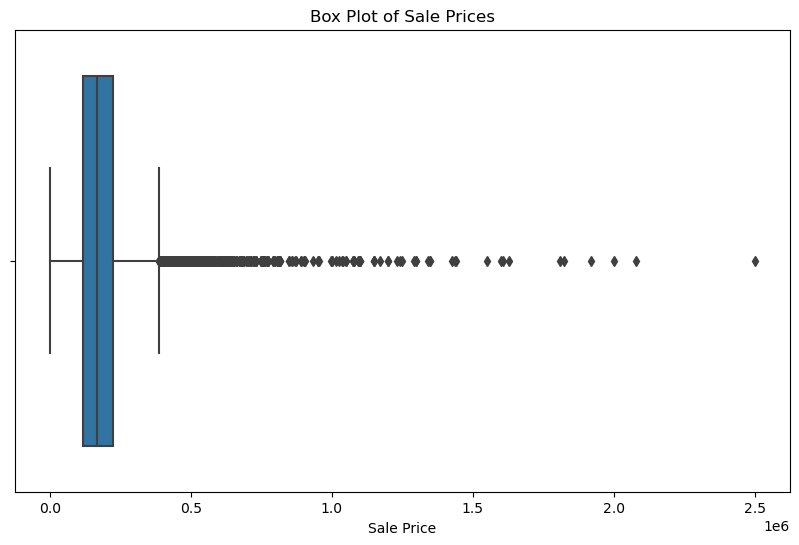

In [182]:
# Create the box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x=residential_df['Sale_price'])
plt.title('Box Plot of Sale Prices')
plt.xlabel('Sale Price')
plt.show()

In [183]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = residential_df['Sale_price'].quantile(0.25)
Q3 = residential_df['Sale_price'].quantile(0.75)

# Calculate the IQR (Interquartile Range)
IQR = Q3 - Q1

# Calculate the lower and upper bound
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out the outliers
df_no_outliers = residential_df[(residential_df['Sale_price'] >= lower_bound) & (residential_df['Sale_price'] <= upper_bound)]


# Display the DataFrame without outliers
df_no_outliers.shape

(25660, 10)

In [184]:
# write to the csv
df_no_outliers.to_csv("Resources/property_sales3.csv")

In [185]:
# Cleaned data into dataframe
propertyModel_df = pd.read_csv("Resources/property_sales_final.csv", encoding="ISO-8859-1")
propertyModel_df.head()

,Unnamed: 0,PropType,Address,Year_Built,FinishedSqft,Bdrms,Bathroom,Lotsize,Sale_date,Sale_price
0,1,Residential,9574 N 107TH ST,1942,1182,4,2,33541,2023-08-31,160000
1,3,Residential,9350 N JOYCE AV,1980,1489,3,3,8640,2023-06-20,335000
2,4,Residential,9355 N BURBANK AV,1986,1209,3,2,7200,2023-01-10,250000
3,5,Residential,8210 W GLENBROOK RD,1989,1663,3,3,7200,2023-12-27,270000
4,25,Residential,8907 N 70TH ST,1984,1311,3,2,7412,2023-01-25,250000


In [190]:
propertyModel_df.shape
propertyModel_df.dtypes

Unnamed: 0       int64
PropType        object
Address         object
Year_Built       int64
FinishedSqft    object
Bdrms            int64
Bathroom         int64
Lotsize         object
Sale_date       object
Sale_price       int64
dtype: object

In [187]:
features = ['Bdrms','Bathroom','FinishedSqft','Lotsize','Sale_date']
X = propertyModel_df.loc[:, features]
y = propertyModel_df.loc[:, ['Sale_price']]

In [188]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, train_size = .80)

In [189]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

ValueError: could not convert string to float: '1,132'